In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

<AxesSubplot:xlabel='date'>

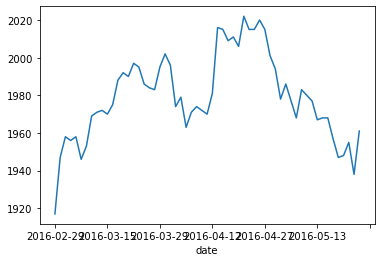

In [7]:
ts = pd.read_csv('./data/kospi3.csv', header=0, index_col=0, squeeze=True, ).sort_index()
ts.plot()

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

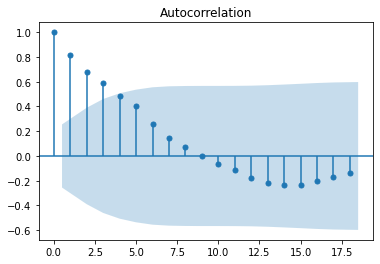

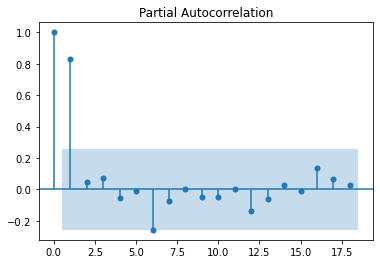

In [8]:
# acf, pacf 그리기

plot_acf(ts)
plot_pacf(ts)
plt.show()

# 결과해석
# ACF : 첫번째 구간(영향력 미치는 구간, 신뢰구간 벗어난 포인트 4개), 그외 실내공간(영향력 없음)
# PACF : 첫번째 구간(영향력 미치는 구간, 신뢰구간 벗어난 포인트 2개), 그외 실내공간(영향력 없음)

In [15]:
# 차분(diff)
# 차분 곡선 그래프(1번 차분)

ts.diff(periods=1).iloc[1:]

date
2016-03-02    30.0
2016-03-03    11.0
2016-03-04    -2.0
2016-03-07     2.0
2016-03-08   -12.0
2016-03-09     7.0
2016-03-10    16.0
2016-03-11     2.0
2016-03-14     1.0
2016-03-15    -2.0
2016-03-16     5.0
2016-03-17    13.0
2016-03-18     4.0
2016-03-21    -2.0
2016-03-22     7.0
2016-03-23    -2.0
2016-03-24    -9.0
2016-03-25    -2.0
2016-03-28    -1.0
2016-03-29    12.0
2016-03-30     7.0
2016-03-31    -6.0
2016-04-01   -22.0
2016-04-04     5.0
2016-04-05   -16.0
2016-04-06     8.0
2016-04-07     3.0
2016-04-08    -2.0
2016-04-11    -2.0
2016-04-12    11.0
2016-04-14    35.0
2016-04-15    -1.0
2016-04-18    -6.0
2016-04-19     2.0
2016-04-20    -5.0
2016-04-21    16.0
2016-04-22    -7.0
2016-04-25     0.0
2016-04-26     5.0
2016-04-27    -5.0
2016-04-28   -14.0
2016-04-29    -7.0
2016-05-02   -16.0
2016-05-03     8.0
2016-05-04    -9.0
2016-05-09    -9.0
2016-05-10    15.0
2016-05-11    -3.0
2016-05-12    -3.0
2016-05-13   -10.0
2016-05-16     1.0
2016-05-17     0.0
2016-05

<AxesSubplot:xlabel='date'>

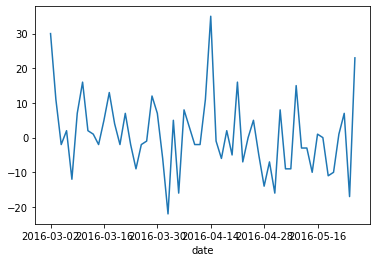

In [14]:
diff_1 = ts.diff(periods=1).iloc[1:]
diff_1.plot()

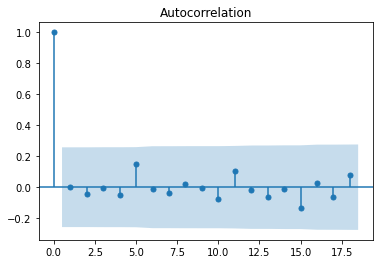

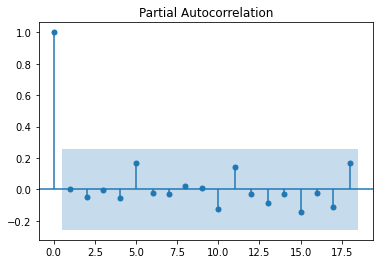

In [12]:
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

# 결과해석
# ACF : 하나(자기자신) 제외, 나머지는 실내공간에 포진
# PACF : 대부분 신뢰구간에 있으나 변동이 심함

In [13]:
# 차분의 차분 그래프

diff_1.diff(periods=1).iloc[1:]

date
2016-03-03   -19.0
2016-03-04   -13.0
2016-03-07     4.0
2016-03-08   -14.0
2016-03-09    19.0
2016-03-10     9.0
2016-03-11   -14.0
2016-03-14    -1.0
2016-03-15    -3.0
2016-03-16     7.0
2016-03-17     8.0
2016-03-18    -9.0
2016-03-21    -6.0
2016-03-22     9.0
2016-03-23    -9.0
2016-03-24    -7.0
2016-03-25     7.0
2016-03-28     1.0
2016-03-29    13.0
2016-03-30    -5.0
2016-03-31   -13.0
2016-04-01   -16.0
2016-04-04    27.0
2016-04-05   -21.0
2016-04-06    24.0
2016-04-07    -5.0
2016-04-08    -5.0
2016-04-11     0.0
2016-04-12    13.0
2016-04-14    24.0
2016-04-15   -36.0
2016-04-18    -5.0
2016-04-19     8.0
2016-04-20    -7.0
2016-04-21    21.0
2016-04-22   -23.0
2016-04-25     7.0
2016-04-26     5.0
2016-04-27   -10.0
2016-04-28    -9.0
2016-04-29     7.0
2016-05-02    -9.0
2016-05-03    24.0
2016-05-04   -17.0
2016-05-09     0.0
2016-05-10    24.0
2016-05-11   -18.0
2016-05-12     0.0
2016-05-13    -7.0
2016-05-16    11.0
2016-05-17    -1.0
2016-05-18   -11.0
2016-05

In [16]:
diff_diff_1 = diff_1.diff(periods=1).iloc[1:]

<AxesSubplot:xlabel='date'>

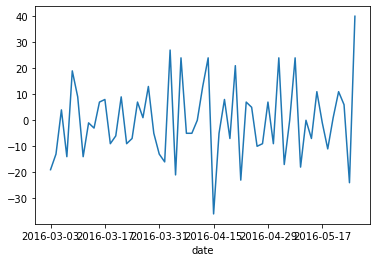

In [17]:
diff_diff_1.plot()

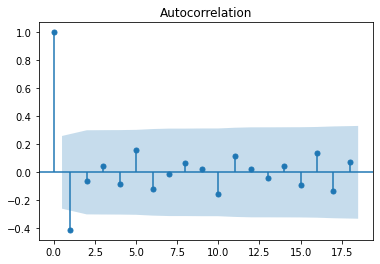

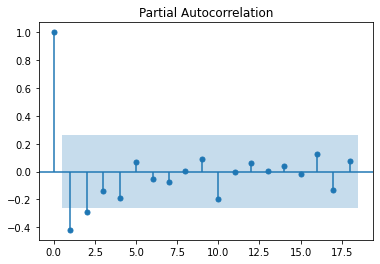

In [18]:
plot_acf(diff_diff_1)
plot_pacf(diff_diff_1)
plt.show()

In [20]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts, order=(1,2,1))  # order : (p,d,q) 차분을 두번(d를 2로 설정)

In [23]:
fitted_model = model.fit(trend='c', full_output=True, disp=1)
# trend : str {'c','nc'}
#     Whether to include a constant or not.  'c' includes constant,
#     'nc' no constant.
print(fitted_model.summary())

# 결과해석
# P>|z| (p-value) : const 0.068 /   ar.L1.D2.close 0.790 (>0.05) 유의하지 않다(값이 좋지 않음)
# ar 삭제 >> 0으로 모델 변경 (0,2,1)

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                   57
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -217.690
Method:                       css-mle   S.D. of innovations             10.632
Date:                Tue, 22 Feb 2022   AIC                            443.379
Time:                        13:20:41   BIC                            451.551
Sample:                             2   HQIC                           446.555
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1465      0.080     -1.823      0.068      -0.304       0.011
ar.L1.D2.close    -0.0396      0.149     -0.266      0.790      -0.332       0.252
ma.L1.D2.close    -1.0000      0.050

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [24]:
model = ARIMA(ts, order=(0,2,1))  # order : (p,d,q) 차분을 두번(d를 2로 설정)
fitted_model = model.fit(trend='c', full_output=True, disp=1)
# trend : str {'c','nc'}
#     Whether to include a constant or not.  'c' includes constant,
#     'nc' no constant.
print(fitted_model.summary())

# 결과해석
# P>|z| (p-value) : const 0.080 (>0.05) 유의하지 않다(값이 좋지 않음)
# trend 'c'를 'nc'로 변경

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                   57
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -217.725
Method:                       css-mle   S.D. of innovations             10.646
Date:                Tue, 22 Feb 2022   AIC                            441.450
Time:                        13:25:08   BIC                            447.579
Sample:                             2   HQIC                           443.832
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1464      0.084     -1.754      0.080      -0.310       0.017
ma.L1.D2.close    -1.0000      0.050    -20.044      0.000      -1.098      -0.902
                                    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [25]:
model = ARIMA(ts, order=(0,2,1))  # order : (p,d,q) 차분을 두번(d를 2로 설정)
fitted_model = model.fit(trend='nc', full_output=True, disp=1)
# trend : str {'c','nc'}
#     Whether to include a constant or not.  'c' includes constant,
#     'nc' no constant.
print(fitted_model.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                   57
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -218.944
Method:                       css-mle   S.D. of innovations             11.055
Date:                Tue, 22 Feb 2022   AIC                            441.887
Time:                        13:26:47   BIC                            445.974
Sample:                             2   HQIC                           443.475
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ma.L1.D2.close    -0.9430      0.059    -15.987      0.000      -1.059      -0.827
                                    Roots                                    
                  Real          Imaginary

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

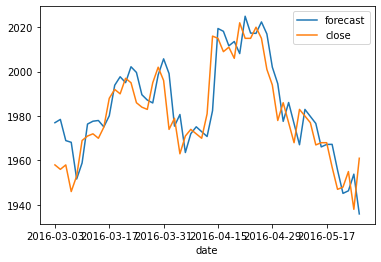

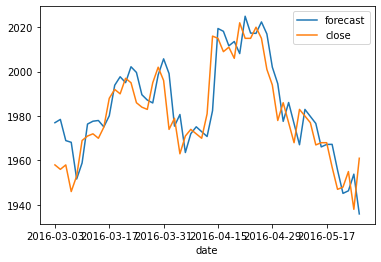

In [26]:
fitted_model.plot_predict()

# close : 실제 데이터, forecast : 예측 데이터 >> 정상성을 가지고 있어 유사하게 나타남

In [27]:
# 예측
# 1단계 시점(t+1) 예측

fore = fitted_model.forecast(steps=1)
print(fore)

(array([1960.3578382]), array([11.05498207]), array([[1938.69047149, 1982.0252049 ]]))


In [31]:
fore_3 = fitted_model.forecast(steps=3)
print(fore_3)

(array([1960.3578382 , 1959.71567639, 1959.07351459]), array([11.05498207, 16.08556887, 20.25813059]), array([[1938.69047149, 1982.0252049 ],
       [1928.18854074, 1991.24281205],
       [1919.36830824, 1998.77872095]]))


In [29]:
fore_5 = fitted_model.forecast(steps=5)
print(fore_5)

(array([1960.3578382 , 1959.71567639, 1959.07351459, 1958.43135279,
       1957.78919099]), array([11.05498207, 16.08556887, 20.25813059, 24.04048209, 27.60792388]), array([[1938.69047149, 1982.0252049 ],
       [1928.18854074, 1991.24281205],
       [1919.36830824, 1998.77872095],
       [1911.31287372, 2005.54983185],
       [1903.6786545 , 2011.89972747]]))


In [28]:
fore_10 = fitted_model.forecast(steps=10)
print(fore_10)

# 결과 해석 : 신뢰구간이 급격히 떨어지는 것을 확인

(array([1960.3578382 , 1959.71567639, 1959.07351459, 1958.43135279,
       1957.78919099, 1957.14702918, 1956.50486738, 1955.86270558,
       1955.22054377, 1954.57838197]), array([11.05498207, 16.08556887, 20.25813059, 24.04048209, 27.60792388,
       31.04743248, 34.40893416, 37.72380791, 41.01303483, 44.29128517]), array([[1938.69047149, 1982.0252049 ],
       [1928.18854074, 1991.24281205],
       [1919.36830824, 1998.77872095],
       [1911.31287372, 2005.54983185],
       [1903.6786545 , 2011.89972747],
       [1896.29517972, 2017.99887865],
       [1889.06459569, 2023.94513907],
       [1881.92540072, 2029.80001043],
       [1874.83647261, 2035.60461494],
       [1867.76905822, 2041.38770573]]))
